## Preprocesamiento del Dataset de Imágenes (Gatos)

In [7]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

base_dir = "cat_skin_disease_split"
img_height, img_width = 224, 224
batch_size = 32

### Conversión de imágenes RGBA → RGB
Algunas imágenes tenían canal alpha (RGBA). Convertimos todas a **RGB** para consistencia.

In [8]:
for split in ["train", "valid", "test"]:
    for cls in os.listdir(os.path.join(base_dir, split)):
        path = os.path.join(base_dir, split, cls)
        for file in os.listdir(path):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(path, file)
                try:
                    img = Image.open(img_path)
                    if img.mode != "RGB":
                        img = img.convert("RGB")
                        img.save(img_path)
                except:
                    print(f"⚠️ Problema con: {img_path}")
print("Conversión completada ✅")

Conversión completada ✅


### Data Augmentation y Normalización
- **Train**: augmentations (rotación, zoom, flips, ajuste de brillo).
- **Valid/Test**: solo redimensionamiento y normalización.
- Normalización: Media y desviación estándar de ImageNet.

In [9]:
# Generador de datos para entrenamiento con data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

# Generadores para validación y test (sin augmentation)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de entrenamiento/validación/test
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'valid'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 699 images belonging to 4 classes.
Found 199 images belonging to 4 classes.
Found 101 images belonging to 4 classes.


### Visualización de imágenes augmentadas

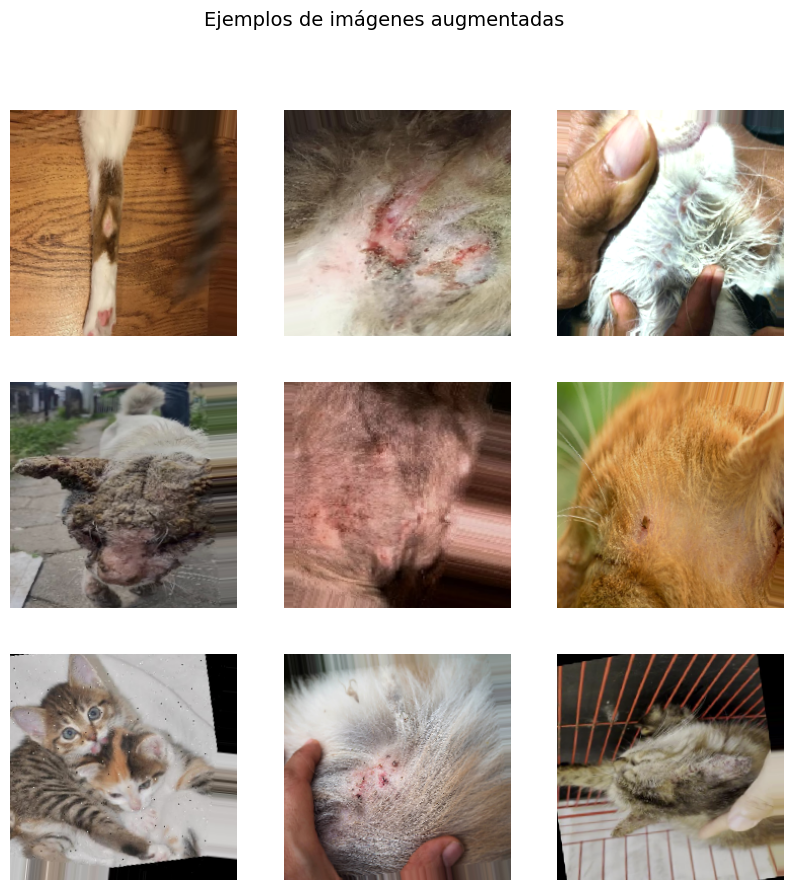

In [10]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes augmentadas", fontsize=14)
plt.show()

### Clases detectadas y balance de datos

In [11]:
print("Clases detectadas:", train_generator.class_indices)
print("Cantidad de imágenes (train):", train_generator.samples)
print("Cantidad de imágenes (valid):", val_generator.samples)
print("Cantidad de imágenes (test):", test_generator.samples)

Clases detectadas: {'Flea_Allergy': 0, 'Health': 1, 'Ringworm': 2, 'Scabies': 3}
Cantidad de imágenes (train): 699
Cantidad de imágenes (valid): 199
Cantidad de imágenes (test): 101


## Preprocesamiento del Dataset de Imágenes (Perros)

In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt

base_dir_dog = "dog_skin_disease_split"
img_height, img_width = 224, 224
batch_size = 32

### Conversión de imágenes RGBA → RGB

In [13]:
for split in ["train", "valid", "test"]:
    for cls in os.listdir(os.path.join(base_dir_dog, split)):
        path = os.path.join(base_dir_dog, split, cls)
        for file in os.listdir(path):
            if file.lower().endswith((".png", ".jpg", ".jpeg")):
                img_path = os.path.join(path, file)
                try:
                    img = Image.open(img_path)
                    if img.mode != "RGB":
                        img = img.convert("RGB")
                        img.save(img_path)
                except:
                    print(f"⚠️ Problema con: {img_path}")
print("Conversión completada ✅")

Conversión completada ✅


### Generadores de imágenes
- **Train**: augmentation + normalización
- **Valid/Test**: solo resize + normalización

In [14]:
# Data Augmentation para entrenamiento
train_datagen_dog = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8,1.2],
    fill_mode='nearest'
)

# Validación y test: sin augmentations
test_val_datagen_dog = ImageDataGenerator(rescale=1./255)

train_generator_dog = train_datagen_dog.flow_from_directory(
    os.path.join(base_dir_dog, 'train'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator_dog = test_val_datagen_dog.flow_from_directory(
    os.path.join(base_dir_dog, 'valid'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator_dog = test_val_datagen_dog.flow_from_directory(
    os.path.join(base_dir_dog, 'test'),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2926 images belonging to 6 classes.
Found 829 images belonging to 6 classes.
Found 423 images belonging to 6 classes.


### Visualización de imágenes augmentadas

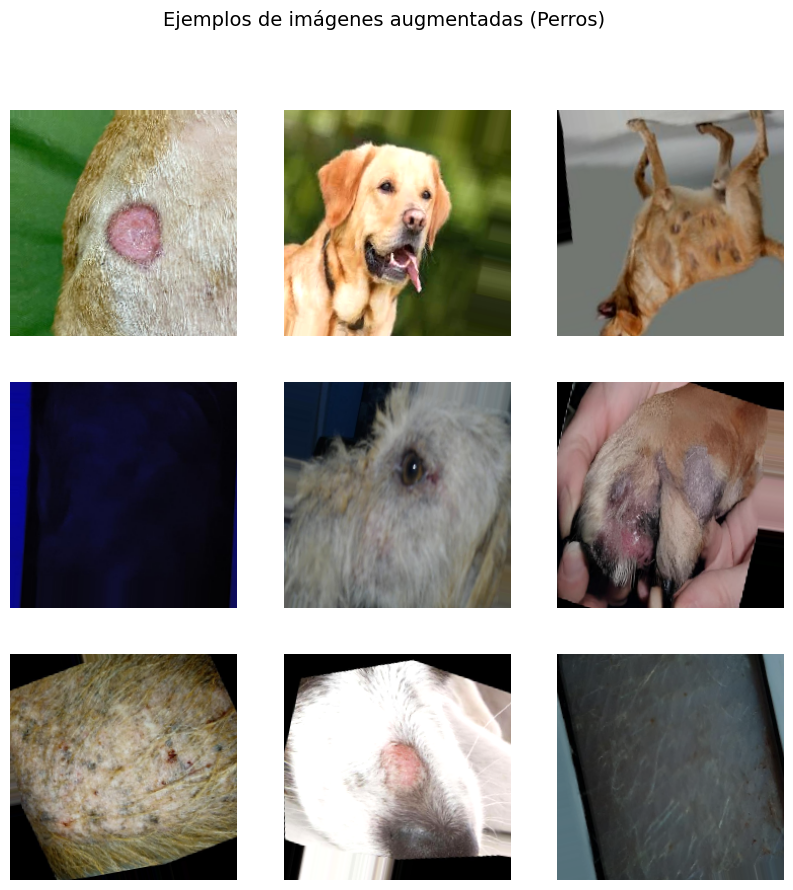

In [15]:
x_batch, y_batch = next(train_generator_dog)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes augmentadas (Perros)", fontsize=14)
plt.show()

### Comprobación de clases y cantidad de imágenes

In [16]:
print("Clases detectadas:", train_generator_dog.class_indices)
print("Cantidad train:", train_generator_dog.samples)
print("Cantidad valid:", val_generator_dog.samples)
print("Cantidad test:", test_generator_dog.samples)

Clases detectadas: {'Dermatitis': 0, 'Fungal_infections': 1, 'Healthy': 2, 'Hypersensitivity': 3, 'demodicosis': 4, 'ringworm': 5}
Cantidad train: 2926
Cantidad valid: 829
Cantidad test: 423
